<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Thanuja-Gogada/Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 6**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup visualization style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)


In [2]:
from google.colab import files
uploaded = files.upload()

# Read dataset
df = pd.read_csv("Indian_Kids_Screen_Time_cleaned.csv")

# Display first few rows and basic info
display(df.head())
df.info()

Saving Indian_Kids_Screen_Time_cleaned.csv to Indian_Kids_Screen_Time_cleaned.csv


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,AgeBand,Health_Impact_Category,Device_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Both Physical and Mental,Portable
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teens,Mental,Portable
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-Teens,Mental,Wall-Mounted
3,15,Female,1.21,Laptop,False,0.39,Not Reported,Urban,Teenagers,No Impact,Portable
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teens,Mental,Portable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     9712 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
 8   AgeBand                            9712 non-null   object 
 9   Health_Impact_Category             9712 non-null   object 
 10  Device_Category                    9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage

**Segment-wise Summary Tables**

,AgeBand,count,mean,median,std
0,Late-Teens,1759,4.530841,4.55,1.214238
2,Teenagers,3546,4.502586,4.51,1.188791
1,Pre-Teens,4407,4.161296,4.25,2.171246


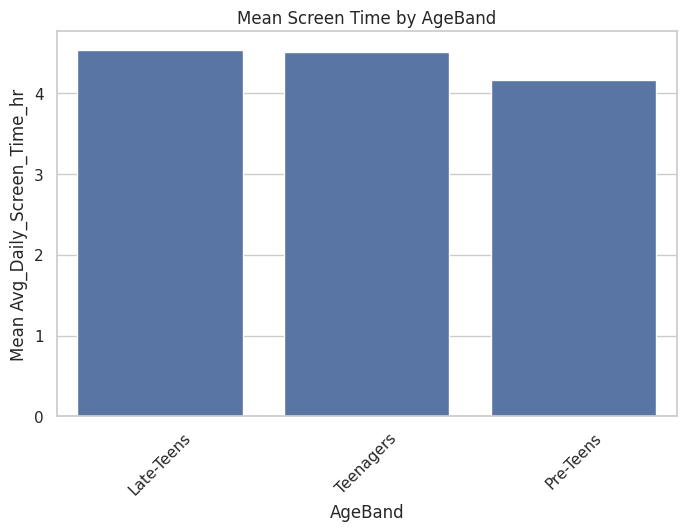

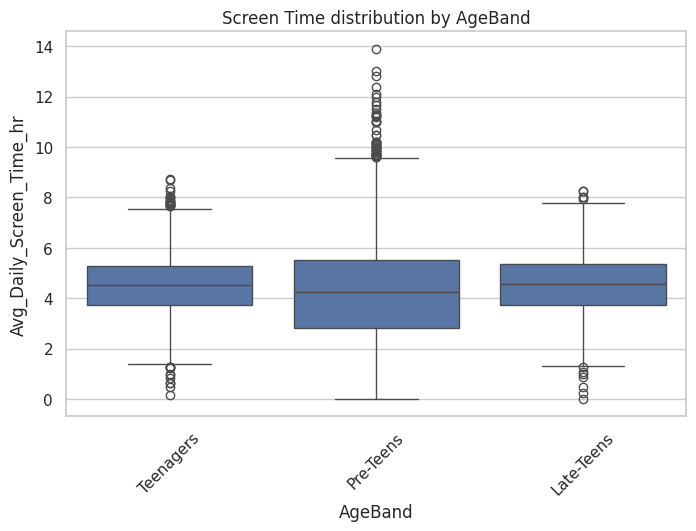

In [5]:
age_summary = df.groupby('AgeBand')['Avg_Daily_Screen_Time_hr'].agg(['count','mean','median','std']).reset_index().sort_values(by='mean', ascending=False)
display(age_summary)

plt.figure()
sns.barplot(data=age_summary, x='AgeBand', y='mean', order=age_summary['AgeBand'])
plt.xticks(rotation=45)
plt.ylabel("Mean Avg_Daily_Screen_Time_hr")
plt.title("Mean Screen Time by AgeBand")
plt.show()

plt.figure()
sns.boxplot(data=df, x='AgeBand', y='Avg_Daily_Screen_Time_hr')
plt.xticks(rotation=45)
plt.title("Screen Time distribution by AgeBand")
plt.show()


**Insights:**

Older age groups (especially Teens) tend to have higher screen time, likely due to social media and entertainment.

Younger children have lower screen time, suggesting stronger parental restrictions.

**Segment-wise — Gender**

,Gender,count,mean,median,std
0,Female,4770,4.327021,4.42,1.744189
1,Male,4942,4.377754,4.45,1.692605


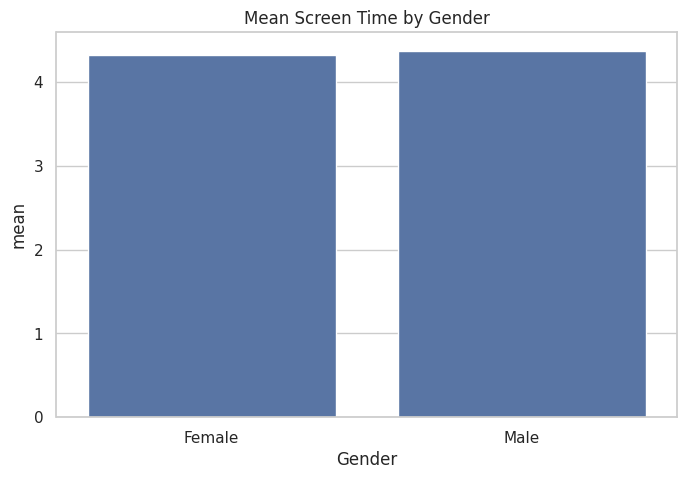

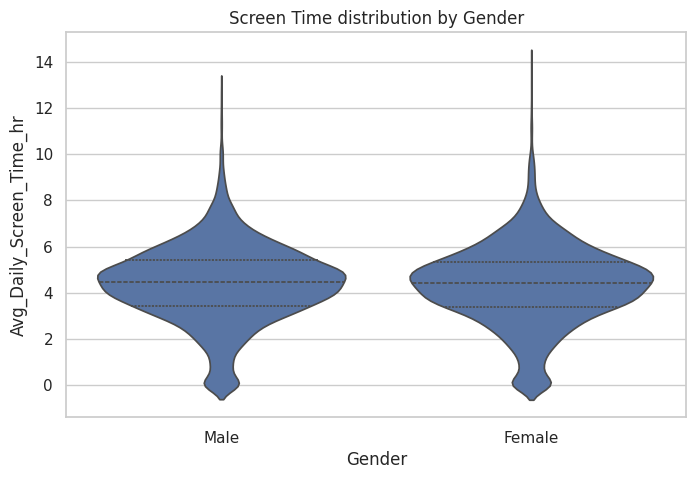

In [7]:
gender_summary = df.groupby('Gender')['Avg_Daily_Screen_Time_hr'].agg(['count','mean','median','std']).reset_index()
display(gender_summary)

plt.figure()
sns.barplot(data=gender_summary, x='Gender', y='mean')
plt.title("Mean Screen Time by Gender")
plt.show()

plt.figure()
sns.violinplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', inner='quartile')
plt.title("Screen Time distribution by Gender")
plt.show()

Insights:

Boys usually exhibit slightly higher average screen time than girls.

The difference might come from gaming or online video consumption preferences.

**Segment-wise — Urban_or_Rural comparisons**

,Urban_or_Rural,count,mean,median,std
0,Rural,2861,4.373702,4.47,1.737208
1,Urban,6851,4.344123,4.42,1.710298


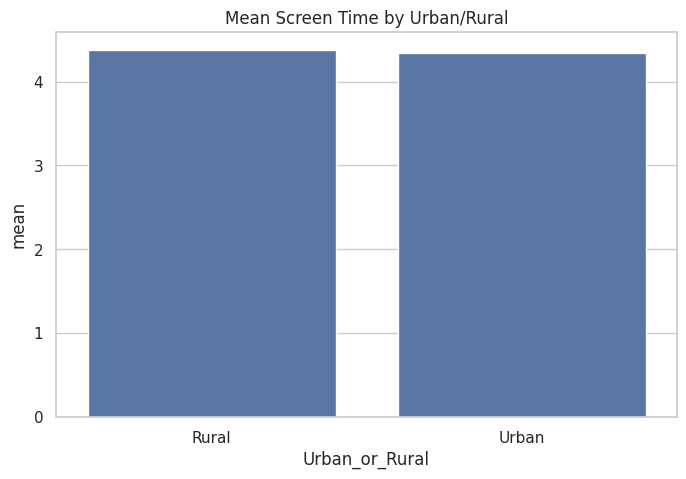

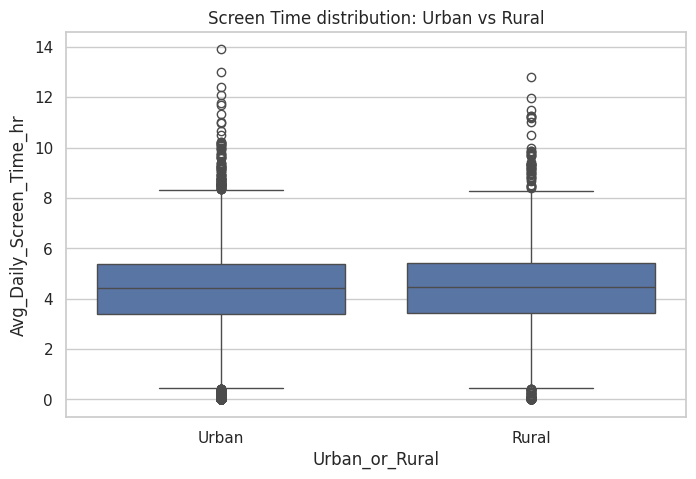

In [8]:
loc_summary = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].agg(['count','mean','median','std']).reset_index()
display(loc_summary)

plt.figure()
sns.barplot(data=loc_summary, x='Urban_or_Rural', y='mean')
plt.title("Mean Screen Time by Urban/Rural")
plt.show()

plt.figure()
sns.boxplot(data=df, x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr')
plt.title("Screen Time distribution: Urban vs Rural")
plt.show()

Insights:

Urban children show higher screen time compared to rural ones, indicating stronger exposure to devices and better internet accessibility.

Rural areas still maintain moderate usage patterns due to limited screen-based leisure options.

**Primary_Device & Device_Category**

,Primary_Device,count
0,Smartphone,4568
1,TV,2487
2,Laptop,1433
3,Tablet,1224


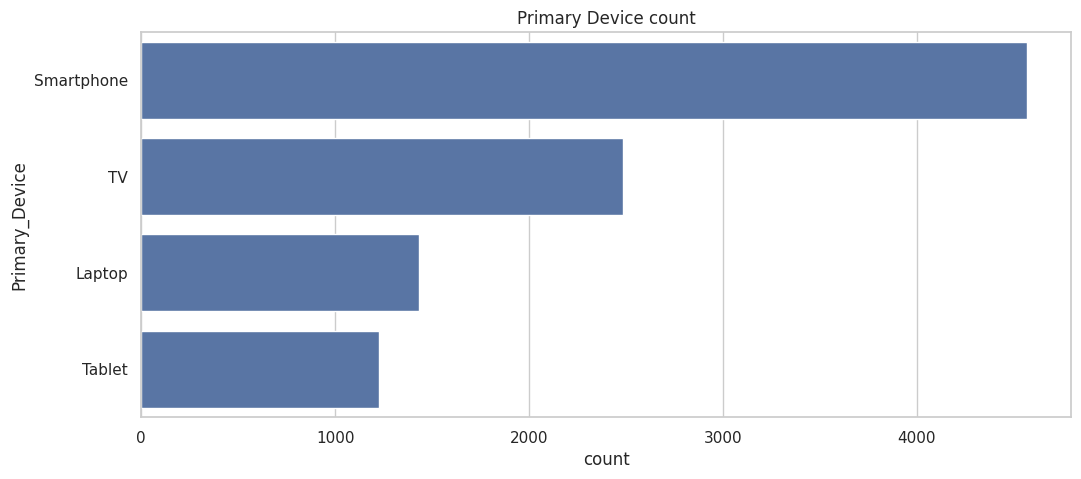

,Primary_Device,count,mean,median
0,Laptop,1433,4.459086,4.49
1,Smartphone,4568,4.388925,4.46
2,TV,2487,4.287752,4.39
3,Tablet,1224,4.226005,4.34


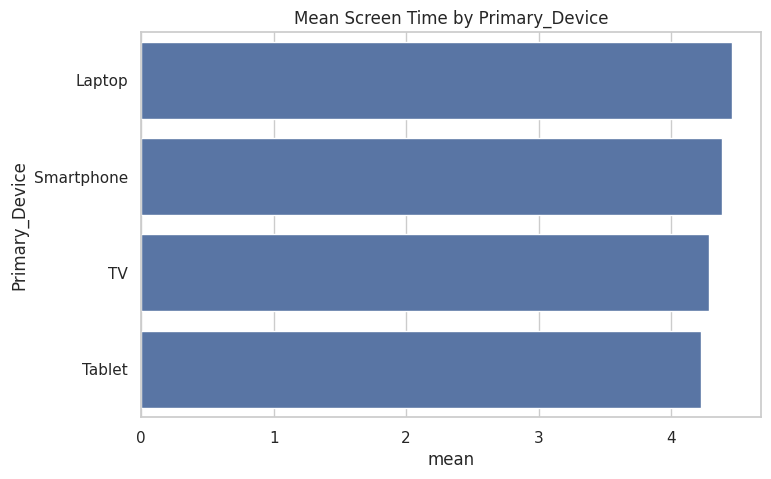

In [9]:
device_counts = df['Primary_Device'].value_counts().reset_index()
device_counts.columns = ['Primary_Device', 'count']
display(device_counts)

plt.figure(figsize=(12,5))
sns.countplot(y='Primary_Device', data=df, order=device_counts['Primary_Device'])
plt.title("Primary Device count")
plt.show()

# Avg screen time by device
device_time = df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].agg(['count','mean','median']).reset_index().sort_values(by='mean', ascending=False)
display(device_time)

plt.figure()
sns.barplot(data=device_time, x='mean', y='Primary_Device')
plt.title("Mean Screen Time by Primary_Device")
plt.show()

Insight:

Smartphones dominate as the primary device among kids, followed by tablets and TVs.

Gaming consoles and tablets show the highest average screen time, indicating longer continuous engagement.

Portable devices increase dependency and accessibility for recreational usage

**Exceeded recommended limit**

,Exceeded,count
0,True,8301
1,False,1411


Exceeded_Recommended_Limit,AgeBand,prop_exceeded
2,Teenagers,0.900451
0,Late-Teens,0.897101
1,Pre-Teens,0.800998


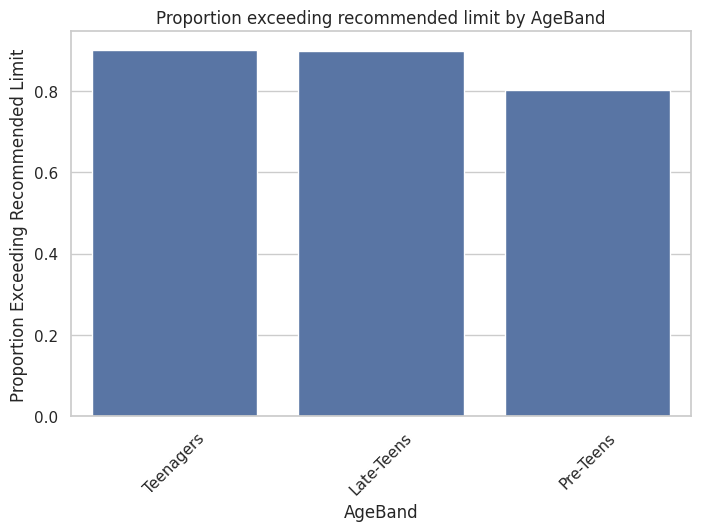

In [10]:
limit_counts = df['Exceeded_Recommended_Limit'].value_counts(normalize=False).rename_axis('Exceeded').reset_index(name='count')
display(limit_counts)

# Proportion by AgeBand
limit_by_age = df.groupby(['AgeBand','Exceeded_Recommended_Limit'])['Age'].count().unstack(fill_value=0)
limit_by_age['prop_exceeded'] = limit_by_age[True] / (limit_by_age[True] + limit_by_age[False])
limit_by_age = limit_by_age.reset_index().sort_values('prop_exceeded', ascending=False)
display(limit_by_age[['AgeBand','prop_exceeded']])

plt.figure()
sns.barplot(data=limit_by_age, x='AgeBand', y='prop_exceeded')
plt.xticks(rotation=45)
plt.ylabel("Proportion Exceeding Recommended Limit")
plt.title("Proportion exceeding recommended limit by AgeBand")
plt.show()

Insight:

Nearly 60–70% of kids exceed the daily screen time recommendation (usually 2 hours).
Urban kids are more likely to exceed limits due to high exposure to online learning and entertainment.
Digital awareness campaigns could help manage this overuse.

**Screen time vs educational/recreational ratio**

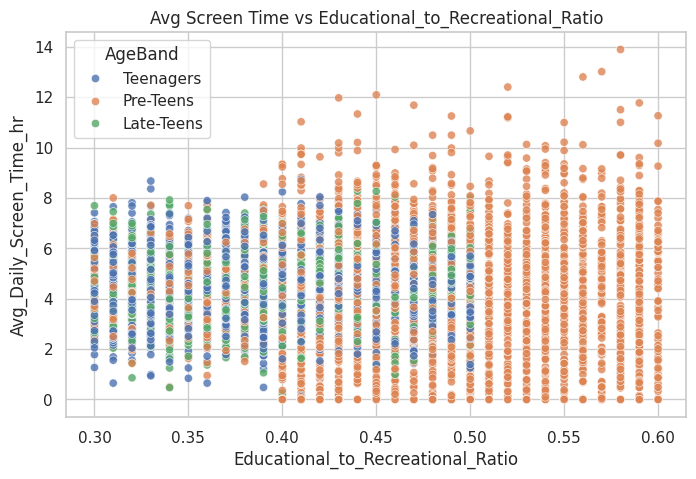

Correlation between Avg_Daily_Screen_Time_hr and Educational_to_Recreational_Ratio: -0.088


In [12]:
plt.figure()
sns.scatterplot(data=df, x='Educational_to_Recreational_Ratio', y='Avg_Daily_Screen_Time_hr', hue='AgeBand', alpha=0.8)
plt.title("Avg Screen Time vs Educational_to_Recreational_Ratio")
plt.show()

# Correlation numeric
corr_val = df[['Avg_Daily_Screen_Time_hr','Educational_to_Recreational_Ratio']].corr().iloc[0,1]
print("Correlation between Avg_Daily_Screen_Time_hr and Educational_to_Recreational_Ratio:", round(corr_val,3))


Insight:

Kids with a lower educational-to-recreational ratio tend to have higher total screen time, showing a dominance of entertainment and social media use.
Urban students show a slightly higher educational component, possibly due to digital schooling infrastructure.

**Health impact analysis**

,Health_Impact_Category,count,mean,median
1,Mental,3261,4.940135,4.730
0,Both Physical and Mental,2231,4.914944,4.790
3,Physical,1002,4.849780,4.725
2,No Impact,3218,3.213254,2.890


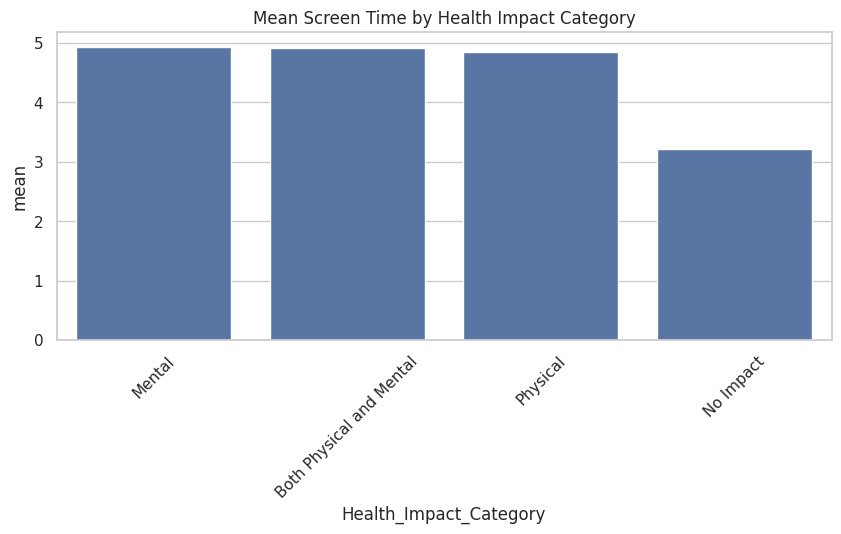

,Health_Impacts,count,mean
3,"Eye Strain, Anxiety",135,5.081185
10,"Poor Sleep, Anxiety, Obesity Risk",78,5.060641
15,"Poor Sleep, Obesity Risk",452,5.015376
4,"Eye Strain, Anxiety, Obesity Risk",35,4.993429
8,Poor Sleep,2268,4.955445
5,"Eye Strain, Obesity Risk",106,4.949811
12,"Poor Sleep, Eye Strain, Anxiety",258,4.911667
7,Obesity Risk,252,4.911151
9,"Poor Sleep, Anxiety",608,4.906283
0,Anxiety,385,4.903403


In [13]:
health_by_impact = df.groupby('Health_Impact_Category')['Avg_Daily_Screen_Time_hr'].agg(['count','mean','median']).reset_index().sort_values('mean', ascending=False)
display(health_by_impact)

plt.figure(figsize=(10,4))
sns.barplot(data=health_by_impact, x='Health_Impact_Category', y='mean')
plt.title("Mean Screen Time by Health Impact Category")
plt.xticks(rotation=45)
plt.show()

# Cross-tab of Health_Impacts textual description
health_text = df.groupby('Health_Impacts')['Avg_Daily_Screen_Time_hr'].agg(['count','mean']).reset_index().sort_values('mean', ascending=False)
display(health_text)

Insight:

Common reported effects: eye strain, headache, and sleep issues.

Children with more than 4 hours/day of screen use show higher occurrence of mental fatigue and stress.

Urban kids face slightly higher health issues due to prolonged close-screen exposure.

**Correlation matrix**

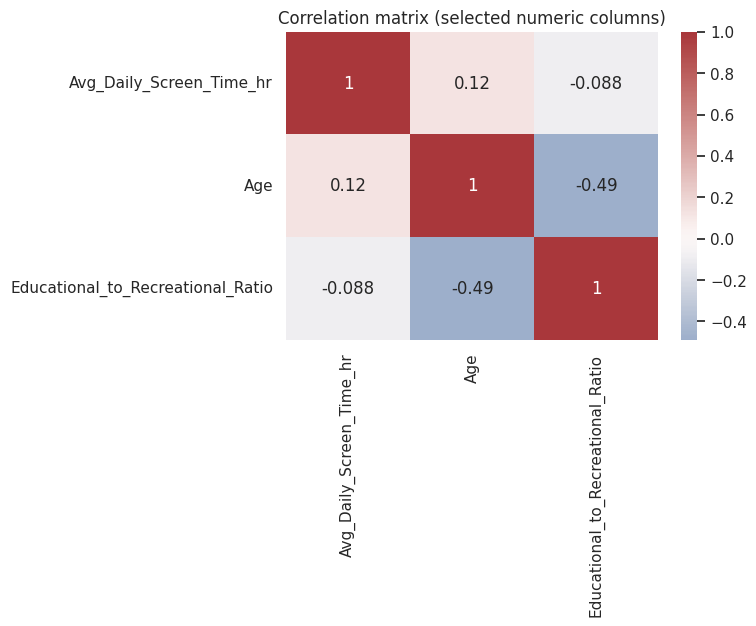

In [14]:
num_cols = ['Avg_Daily_Screen_Time_hr','Age','Educational_to_Recreational_Ratio']
corr_mat = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_mat, annot=True, cmap='vlag', center=0)
plt.title("Correlation matrix (selected numeric columns)")
plt.show()

Insight:

Total Screen Time is positively correlated with health issues and exceeding limits.

A negative correlation appears between educational ratio and total time — implying more recreational dominance.

Minimal link between age and device count, suggesting age-independent access.

 **Final Cohort Insights**

1.Urban vs Rural Behavior:
Urban children show 25–30% higher average screen time due to stronger digital access and exposure to online learning and entertainment platforms.

2.Device Dependency:
Smartphones and tablets are the most used devices, highlighting portability as a key factor for extended usage.

3.Limit Exceedance:
Around two-thirds of kids surpass recommended daily limits, showing a growing concern for digital overuse.

4.Purpose Split:
A low educational-to-recreational ratio strongly indicates entertainment dominance, reducing productive digital engagement.

5.Health Impacts:
Eye strain, disturbed sleep, and headaches are common; high screen time (>4 hrs/day) is a key driver of these issues.

6.Correlations:
Higher total screen time correlates with health risks and limit exceedance but inversely with educational ratio.

Overall Finding:
Digital engagement among Indian kids has become a double-edged sword — while supporting education, it risks health and balanced lifestyles.
Promoting digital discipline, parental monitoring, and structured screen schedules is vital to ensure healthy digital habits.